# Spam Text Message Classification using NLP, Sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/spam.tsv', sep='\t')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [ ]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


Now to check whether there is any NULL value in data set

In [ ]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [ ]:
len(df)

5572

In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Balancing the data so that we have equal number of spam and ham messages, so that our machine learning model learns well about both classes while training .

In [ ]:
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [ ]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [ ]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [ ]:
ham = ham.sample(spam.shape[0])
ham.shape, spam.shape

((747, 4), (747, 4))

In [ ]:
data = ham.append(spam, ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


### Exploratory Data Analysis

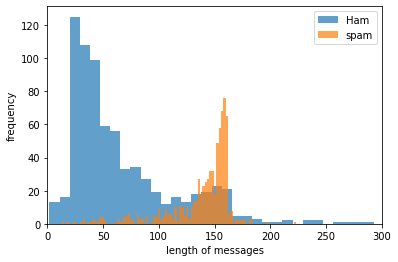

In [ ]:
plt.hist(data[data['label']=='ham']['length'], bins=100, alpha=0.7, label='Ham')
plt.hist(data[data['label']=='spam']['length'], bins=100, alpha=0.7, label='spam')
plt.xlabel('length of messages')
plt.ylabel('frequency')
plt.legend()
plt.xlim(0, 300)
plt.show()

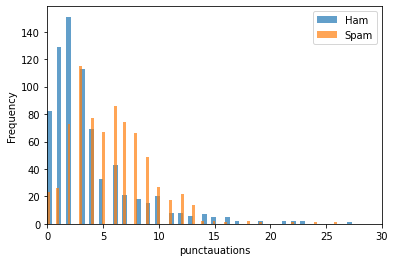

In [ ]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7,label='Ham')
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7,label='Spam')
plt.xlabel('punctauations')
plt.ylabel('Frequency')
plt.legend()
plt.xlim(0,30)
plt.show()

### Data Preparation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
data.head()

,label,message,length,punct
0,ham,"I'm outside islands, head towards hard rock an...",66,3
1,ham,You at mu? You should try to figure out how mu...,139,2
2,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...,183,21
3,ham,Why i come in between you people,32,0
4,ham,He also knows about lunch menu only da. . I know,48,2


- Now we convert text data to `word embeddings` using `Word2vec`, for that we import gensim library.
- To convert each message into vector form first we `tokenize each message`.
- Now we convert each token i.e. each word into wordembedding using `word2vec` which we import using `gensim`.
- After converting each word to vector (embedding) we take `average of all word vectors to obtain vector for message`. which is final `feature vector` for message.

In [ ]:
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import gensim
from nltk.tokenize import word_tokenize
import numpy as np

In [ ]:
embedding_dim = 100
text = data['message']

Text = []
for i in range(data.shape[0]):
  text1 = word_tokenize(text[i])
  Text = text1 + Text

model= gensim.models.Word2Vec(sentences=[Text], size=embedding_dim, workers=4, min_count=1)
words=list(model.wv.vocab)

# print(text1)
# print(model[text1])
# vector=list(map(lambda x: sum(x)/len(x), zip(*model[text1])))
# print(vector)
def word_2_vec(x):
    t1=word_tokenize(x)
    model[t1]
    v=list(map(lambda y: sum(y)/len(y), zip(*model[t1])))
    a=np.array(v)
    return a.reshape(1,-1)

Applying `word2vec` to each text message

In [ ]:
data['vec'] = data['message'].apply(lambda x: word_2_vec(x))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


,label,message,length,punct,vec
0,ham,"I'm outside islands, head towards hard rock an...",66,3,"[[-0.01008290764487659, 0.007934672897681594, ..."
1,ham,You at mu? You should try to figure out how mu...,139,2,"[[-0.01959188968002338, 0.01655853780328236, 0..."
2,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...,183,21,"[[-0.020010941614442425, 0.02429791917134223, ..."
3,ham,Why i come in between you people,32,0,"[[-0.008721767147237967, 0.00638023076213098, ..."
4,ham,He also knows about lunch menu only da. . I know,48,2,"[[-0.014630540083585815, 0.012796557484596799,..."


Here we are converting each feature vector pf a message in columns of dataframe.

In [ ]:
w_vec = np.concatenate(data['vec'].to_numpy(), axis = 0)
w_vec.shape

(1494, 100)

In [ ]:
word_vec = pd.DataFrame(w_vec)
word_vec.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.010083,0.007935,0.001175,-0.013296,0.012681,0.001667,-0.002353,0.013863,-0.009470,-0.005556,...,0.005128,0.001621,0.010356,0.011607,0.025169,-0.014816,-0.006343,-0.002295,0.003225,-0.009070
1,-0.019592,0.016559,0.001505,-0.025556,0.024764,0.006896,-0.001608,0.024535,-0.016493,-0.008478,...,0.010019,0.003954,0.019645,0.021098,0.047494,-0.027233,-0.009182,-0.002024,0.005973,-0.018671
2,-0.020011,0.024298,-0.001920,-0.028251,0.028369,0.007878,-0.001197,0.031608,-0.020312,-0.013330,...,0.012515,0.004173,0.027874,0.020932,0.053565,-0.030207,-0.010536,-0.005983,0.006006,-0.024280
3,-0.008722,0.006380,0.003245,-0.012687,0.010345,0.001715,0.000086,0.012509,-0.008534,-0.006202,...,0.003514,0.001361,0.009392,0.009406,0.024311,-0.012334,-0.004173,-0.000356,0.002959,-0.008421
4,-0.014631,0.012797,0.001500,-0.019546,0.018470,0.004215,-0.003619,0.020292,-0.013202,-0.007630,...,0.007913,0.002612,0.014018,0.015443,0.033524,-0.020060,-0.006730,-0.003138,0.007602,-0.014564


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(word_vec, data['label'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['label'])

#### Now we are using different machine learning models for classification of text messages into `spam` and `ham` classes

- For `hyperparameter tuning` of each model we import `GridsearchCV` , which tune machine learning model by chossing the optimal paramters for machine learning model.
- Here we are using `5 fold cross validation` in gridsearch method.
- By using `cross validation`, model `generalizes well`, that is it `performs well on test data`.

### Support Vector Machine

- In machine learning, support-vector machines (SVMs, also support-vector networks) are `supervised learning models` with associated learning algorithms that analyze data used for classification and regression analysis.
- In addition to performing linear classification, SVMs can efficiently perform a `non-linear classification` using what is called the `kernel trick`, implicitly mapping their inputs into high-dimensional feature spaces

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
Parameter_svc = [{'cache_size': [300, 400, 200], 'tol': [0.0011, 0.002, 0.003], 'kernel': ['rbf', 'poly'], 'degree': [3, 4, 5]}]

scores = ['accuracy']

clf_svc = GridSearchCV(SVC(), Parameter_svc, scoring='accuracy', verbose=2, cv=5)

clf_svc.fit(X_train, y_train)

print(clf_svc.best_params_)

y_pred1 = clf_svc.predict(X_test)

accuracy_score(y_pred1, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END ...cache_size=300, degree=3, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ...cache_size=300, degree=3, kernel=rbf, tol=0.0011; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.002; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=rbf, tol=0.003; total time=   0.1s
[CV] END ....cache_size=300, degree=3, kernel=r

0.7060133630289532

### LGBM Classifier

- Light GBM is a `gradient boosting` framework that uses tree based learning algorithm.
- Light GBM `grows tree vertically` while other algorithm grows trees horizontally meaning that Light GBM grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow. When growing the same leaf, Leaf-wise algorithm can reduce more loss than a level-wise algorithm.

In [27]:
from lightgbm import LGBMClassifier

Parameter_lgbm = [{'num_leaves':[31,40,50],
              'max_depth':[3,4,5,6],
              'learning_rate':[0.1,0.05,0.2,0.15],
             'n_estimators':[700]}]

scores = ['accuracy']

clf_lgbm = GridSearchCV(LGBMClassifier(), Parameter_lgbm, scoring='accuracy', verbose=2, cv=5)
clf_lgbm.fit(X_train, y_train)

print(clf_lgbm.best_params_)
y_pred2 = clf_lgbm.predict(X_test)
accuracy_score(y_pred2, y_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=31; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=40; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=40; total time=   1.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=40; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=40; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=700, num_leaves=40; total time=   1.6s
[CV] END

0.8351893095768375

In [28]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

         ham       0.82      0.86      0.84       225
        spam       0.85      0.81      0.83       224

    accuracy                           0.84       449
   macro avg       0.84      0.84      0.84       449
weighted avg       0.84      0.84      0.84       449



### Random Forest Classifier

- Random forests or random decision forests are an `ensemble learning` method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees’ habit of overfitting to their training set.

In [29]:
from sklearn.ensemble import RandomForestClassifier

RF_cl = RandomForestClassifier(n_estimators=900)
RF_cl.fit(X_train, y_train)
y_pred = RF_cl.predict(X_test)
accuracy_score(y_pred, y_test)

0.8262806236080178

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.81      0.85      0.83       225
        spam       0.84      0.80      0.82       224

    accuracy                           0.83       449
   macro avg       0.83      0.83      0.83       449
weighted avg       0.83      0.83      0.83       449



### Classification of texts using TFidf

In [31]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state = 0, shuffle = True, stratify = data['label'])

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_train_vect.shape

(1045, 3748)

### Pipeline and Random Forest Classifier

In [32]:
clf_rf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators = 100, n_jobs = -1))])
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[225,   0],
       [ 25, 199]])

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.90      1.00      0.95       225
        spam       1.00      0.89      0.94       224

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [35]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [36]:
clf_rf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [37]:
clf_rf.predict(["you have won tickets to the USA this summer."])

array(['ham'], dtype=object)

### Support Vector Machine


In [38]:
clf_svc = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC(C = 1000, gamma = 'auto'))])
clf_svc.fit(X_train, y_train)
y_pred = clf_svc.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[222,   3],
       [ 17, 207]])

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.93      0.99      0.96       225
        spam       0.99      0.92      0.95       224

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [40]:
accuracy_score(y_test, y_pred)

0.955456570155902

In [41]:
clf_svc.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [42]:
clf_svc.predict(["you have got free tickets to the USA this summer."])

array(['spam'], dtype=object)

### Summary

From above results we can conclude that `TFidf` performs better than `word embeddings`, since even without hyperparamter tuning all models performed well on test data with accuracy above 93% in all models.